# Lab-8
## Srinath Krishnan
## SMK220008


## Preparation

Use dataset that is provided in the eLearning

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
"""
Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')

    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())

    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [14]:
X_train = pd.read_csv('SBA_loans_train.csv')
X_test  = pd.read_csv('SBA_loans_test.csv')
orig_columns = list(X_train.columns)

In [15]:
print(orig_columns)

['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'Defaulted']


In [16]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (337186, 20)
Test shape: (112396, 20)


**Review dataset**

In [17]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,22069,object,1,30,"{'LOS ANGELES': 4278, 'HOUSTON': 3801, 'NEW YO..."
1,State,51,object,2,3,"{'CA': 49031, 'TX': 26500, 'NY': 21508, 'FL': ..."
2,Zip,26044,int64,1,5,"{90015: 344, 10001: 328, 93401: 308, 33166: 26..."
3,Bank,4833,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 32382, 'WELLS F..."
4,BankState,55,object,2,3,"{'CA': 44497, 'NC': 29717, 'IL': 24674, 'OH': ..."
5,NAICS,1279,int64,1,6,"{0: 75763, 722110: 10456, 722211: 7319, 811111..."
6,Term,372,int64,1,3,"{84: 86087, 60: 33770, 240: 32245, 120: 29056,..."
7,NoEmp,433,int64,1,4,"{1: 57553, 2: 51865, 3: 34228, 4: 27633, 5: 22..."
8,NewExist,3,float64,3,3,"{1.0: 241894, 2.0: 94857, 0.0: 389}"
9,CreateJob,180,int64,1,4,"{0: 236015, 1: 23537, 2: 21779, 3: 10849, 4: 7..."


In [18]:
X_train.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
count,337186.000000,337186.000000,337186.000000,337186.000000,337140.000000,337186.000000,337186.000000,337186.000000,337186.000000,3.371860e+05,337186.000000,3.371860e+05,3.371860e+05,337186.000000
mean,53839.723945,398565.095974,110.888984,11.310229,1.280204,8.590790,10.977176,2754.662685,0.758050,2.021301e+05,5.643016,1.935411e+05,1.501295e+05,0.175191
std,31173.277974,263305.463724,78.951681,68.753263,0.451661,239.591219,240.184246,12749.672453,0.646786,2.892966e+05,2232.801967,2.847135e+05,2.293072e+05,0.380131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+02,1.000000e+02,0.000000
25%,27604.250000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.201250e+04,0.000000,3.500000e+04,2.125000e+04,0.000000
50%,55414.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+05,0.000000,9.000000e+04,6.210000e+04,0.000000
75%,83706.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.400000e+05,0.000000,2.270000e+05,1.750000e+05,0.000000
max,99999.000000,928120.000000,505.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.100000e+07,996262.000000,5.000000e+06,4.869000e+06,1.000000


In [19]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0


Explore levels and counts in the `RevLineCr` column. As we can see, some column values needs to be "cleaned"

In [20]:
desc_df.iloc[13]["Level_Values"]

{'N': 157494,
 '0': 96923,
 'Y': 75248,
 'T': 5797,
 'R': 7,
 '1': 6,
 '`': 2,
 '2': 1,
 ',': 1,
 '7': 1,
 'A': 1,
 '-': 1,
 'Q': 1}

## Question 1 - 10 point


Replace missing values for all columns for both X_train and X_test.
Replace Na's with zero for numerical variables and with "Missing" for categorical

In [21]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Replace missing values in numerical columns with zero
X_train[numerical_cols] = X_train[numerical_cols].fillna(0)
X_test[numerical_cols] = X_test[numerical_cols].fillna(0)

# Replace missing values in categorical columns with "Missing"
X_train[categorical_cols] = X_train[categorical_cols].fillna("Missing")
X_test[categorical_cols] = X_test[categorical_cols].fillna("Missing")

# Verify that there are no missing values left
print("Missing values in X_train after imputation:", X_train.isna().sum().sum())
print("Missing values in X_test after imputation:", X_test.isna().sum().sum())

Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0


## Question 2 - 20 points

In this question you are asked to encode categorical variables.   
Because we are going to use Decision Tree approach in the Lab, we will not use One-Hot encoding. Instead, you will utilize  Label encoding, Target encoding and Weight of Evidence encoding.  

For Target encoding and WOE, use `category_encoders` library.
  
Your goal is to determine which approach works better with the given dataset.

Consider following variables to be Categorical:
- "City"  has  22070  values
- "State"  has  52  values
- "Bank"  has  4834  values
- "BankState"  has  56  values
- "RevLineCr"  has  14  values
- "LowDoc"  has  8  values

For the categorical variables listed above, use the three types of categorical variables encoders:  
- Use LabelEncoder from `sklearn.preprocessing`
- Use Target encoding from here: https://contrib.scikit-learn.org/category_encoders/targetencoder.html
- Use WOE encoder from here: https://contrib.scikit-learn.org/category_encoders/woe.html

Take following steps with encoders:
   - Target and WOE:
        - Define encoder
        - Fit encoder on training data only
        - Transform Train/test datasets separately
   - Label Encoder:
        - Fit Label encoder on the combination of train/test data or modify logic of Label encoder to handle unseen valid values
        - If you decide to fit the encoder on Training data only, make sure you have treatment for unseen values: values that present in Test dataset but not in Train dataset
        - Transform Train/test datasets separately

For each encoder, give new column names "Original-name"_le (for Label encoder), "Original-name"_te for target-encoder and "Original-name"_woe for WOE encoder. After encoding, your train/test dataframes will have all the original columns, plus new columns with encoded values.

You should save fitted encoders (Label, TE and WOE) in the Python dictionary named `cat_encoders`.
The key in the `cat_encoders` will be Python set with (column-name, encoder-type). For example, `("City","le")`
Saved encoders will be handy when you try to score trained model on unseen data that has to be transformed before scoring.

In [11]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [22]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder, WOEEncoder

categorical_columns = ["City", "State", "Bank", "BankState", "RevLineCr", "LowDoc"]

cat_encoders = {}

y_train = X_train['Defaulted'].copy()

combined_data = pd.concat([X_train[categorical_columns], X_test[categorical_columns]])

for column in categorical_columns:
    le = LabelEncoder()
    le.fit(combined_data[column].fillna('Missing'))
    X_train[f"{column}_le"] = le.transform(X_train[column].fillna('Missing'))
    X_test[f"{column}_le"] = le.transform(X_test[column].fillna('Missing'))
    cat_encoders[(column, "le")] = le

for column in categorical_columns:
    te = TargetEncoder(cols=[column])
    te.fit(X_train[column].fillna('Missing'), y_train)
    X_train[f"{column}_te"] = te.transform(X_train[column].fillna('Missing'))
    X_test[f"{column}_te"] = te.transform(X_test[column].fillna('Missing'))
    cat_encoders[(column, "te")] = te

for column in categorical_columns:
    woe = WOEEncoder(cols=[column])
    woe.fit(X_train[column].fillna('Missing'), y_train)
    X_train[f"{column}_woe"] = woe.transform(X_train[column].fillna('Missing'))
    X_test[f"{column}_woe"] = woe.transform(X_test[column].fillna('Missing'))
    cat_encoders[(column, "woe")] = woe

print(f"X_train shape after encoding: {X_train.shape}")
print(f"X_test shape after encoding: {X_test.shape}")
print(f"Number of encoders stored: {len(cat_encoders)}")

X_train shape after encoding: (337186, 38)
X_test shape after encoding: (112396, 38)
Number of encoders stored: 18


In [23]:
len_data = len(X_train)
for col in X_train.drop(columns=['Defaulted']).columns:
  if X_train[col].dtype == 'object':
    print("Column ",col," has ",X_train[col].nunique()," values")

Column  City  has  22070  values
Column  State  has  52  values
Column  Bank  has  4834  values
Column  BankState  has  56  values
Column  RevLineCr  has  14  values
Column  LowDoc  has  8  values


## Question 3 - 20 points

Train one model for every type of categorical encoding: Label, Target and WOE :
```
max_depth = 10

dtc = DecisionTreeClassifier(random_state=0,
                             criterion="entropy",
                             max_depth=max_depth)

```

Report F1, and confusion matrix for each of the 3 models.  
Use F1 score "weighted" : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np

max_depth = 10

# Get the target variable for test data
y_test = X_test['Defaulted'].copy()

# Model 1: Using Label Encoded features
label_features = [f"{col}_le" for col in categorical_columns]
X_train_le = X_train[label_features]
X_test_le = X_test[label_features]

dtc_le = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=max_depth)
dtc_le.fit(X_train_le, y_train)
y_pred_le = dtc_le.predict(X_test_le)

f1_le = f1_score(y_test, y_pred_le, average='weighted')
cm_le = confusion_matrix(y_test, y_pred_le)

print("Label Encoding Results:")
print(f"F1 Score (weighted): {f1_le}")
print("Confusion Matrix:")
print(cm_le)
print("\n")

# Model 2: Using Target Encoded features
target_features = [f"{col}_te" for col in categorical_columns]
X_train_te = X_train[target_features]
X_test_te = X_test[target_features]

dtc_te = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=max_depth)
dtc_te.fit(X_train_te, y_train)
y_pred_te = dtc_te.predict(X_test_te)

f1_te = f1_score(y_test, y_pred_te, average='weighted')
cm_te = confusion_matrix(y_test, y_pred_te)

print("Target Encoding Results:")
print(f"F1 Score (weighted): {f1_te}")
print("Confusion Matrix:")
print(cm_te)
print("\n")

# Model 3: Using WOE Encoded features
woe_features = [f"{col}_woe" for col in categorical_columns]
X_train_woe = X_train[woe_features]
X_test_woe = X_test[woe_features]

dtc_woe = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=max_depth)
dtc_woe.fit(X_train_woe, y_train)
y_pred_woe = dtc_woe.predict(X_test_woe)

f1_woe = f1_score(y_test, y_pred_woe, average='weighted')
cm_woe = confusion_matrix(y_test, y_pred_woe)

print("WOE Encoding Results:")
print(f"F1 Score (weighted): {f1_woe}")
print("Confusion Matrix:")
print(cm_woe)
print("\n")

# Compare the models
print("Model Comparison:")
print(f"Label Encoding F1: {f1_le}")
print(f"Target Encoding F1: {f1_te}")
print(f"WOE Encoding F1: {f1_woe}")
print(f"Best performing model: {max(['Label', 'Target', 'WOE'], key=lambda x: {'Label': f1_le, 'Target': f1_te, 'WOE': f1_woe}[x])} Encoding")

Label Encoding Results:
F1 Score (weighted): 0.8028015223417931
Confusion Matrix:
[[90503  2186]
 [15828  3879]]


Target Encoding Results:
F1 Score (weighted): 0.8026757602755061
Confusion Matrix:
[[89348  3341]
 [15326  4381]]


WOE Encoding Results:
F1 Score (weighted): 0.7991992253680227
Confusion Matrix:
[[90380  2309]
 [16010  3697]]


Model Comparison:
Label Encoding F1: 0.8028015223417931
Target Encoding F1: 0.8026757602755061
WOE Encoding F1: 0.7991992253680227
Best performing model: Label Encoding


## Question 4 - 20 points

To answer this question use categorical columns encoded with Target encoder.

You will split Train dataset using 80/20 split to Train/Validation.
Use new Train dataset to fit the model.
Use Validation dataset to evaluate the model and identify best model.

Tune Decision Tree model to identify hyper-parameters that lead to best performance as measured by F1 score ("weighted") on the Validation dataset.

Here is Hyper parameter space:  
   - max_depth = [5,10,12,15,20]  
   - min_samples_split = [25, 50, 75]  
   - min_impurity_decrease = [0.0, 0.02, 0.05]  
    
You should train 5x3x3 = 45 models

From the above 45 models, identify best model as measured by F1 score on Validation dataset.  
For the Best model:
- Report set of hyper parameters used to train the model.  
- Report F1 and confusion matrix on **Validation** dataset.  
- Report F1 and confusion matrix on **Test** dataset.


In [28]:

from sklearn.model_selection import train_test_split

# Use categorical columns encoded with Target encoder
target_features = [f"{col}_te" for col in categorical_columns]

# Split the training data into training and validation sets (80/20)
X_train_te = X_train[target_features]
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train_te, y_train, test_size=0.2, random_state=42
)

# Define hyperparameter space
max_depths = [5, 10, 12, 15, 20]
min_samples_splits = [25, 50, 75]
min_impurity_decreases = [0.0, 0.02, 0.05]

# Initialize variables to keep track of the best model
best_f1 = 0
best_params = {}
best_model = None
results = []

# Train all models (5 x 3 x 3 = 45 models)
for depth in max_depths:
    for min_samples in min_samples_splits:
        for min_impurity in min_impurity_decreases:
            # Train the model
            dtc = DecisionTreeClassifier(
                random_state=0,
                criterion="entropy",
                max_depth=depth,
                min_samples_split=min_samples,
                min_impurity_decrease=min_impurity
            )

            dtc.fit(X_train_new, y_train_new)

            # Predict on validation set
            y_val_pred = dtc.predict(X_val)

            # Calculate F1 score
            val_f1 = f1_score(y_val, y_val_pred, average='weighted')

            # Store results
            results.append({
                'max_depth': depth,
                'min_samples_split': min_samples,
                'min_impurity_decrease': min_impurity,
                'f1_score': val_f1
            })

            # Update best model if current is better
            if val_f1 > best_f1:
                best_f1 = val_f1
                best_params = {
                    'max_depth': depth,
                    'min_samples_split': min_samples,
                    'min_impurity_decrease': min_impurity
                }
                best_model = dtc

# Create dataframe of results for easy viewing
results_df = pd.DataFrame(results)
print("Best model parameters:")
print(f"max_depth: {best_params['max_depth']}")
print(f"min_samples_split: {best_params['min_samples_split']}")
print(f"min_impurity_decrease: {best_params['min_impurity_decrease']}")
print(f"Validation F1 Score: {best_f1}")

# Confusion matrix for best model on validation set
val_pred = best_model.predict(X_val)
val_cm = confusion_matrix(y_val, val_pred)
print("\nConfusion Matrix on Validation Set:")
print(val_cm)

# Evaluate best model on test set
X_test_te = X_test[target_features]
test_pred = best_model.predict(X_test_te)
test_f1 = f1_score(y_test, test_pred, average='weighted')
test_cm = confusion_matrix(y_test, test_pred)

print("\nTest Set Performance:")
print(f"F1 Score: {test_f1}")
print("Confusion Matrix:")
print(test_cm)

Best model parameters:
max_depth: 15
min_samples_split: 75
min_impurity_decrease: 0.0
Validation F1 Score: 0.8200372055339026

Confusion Matrix on Validation Set:
[[53719  1922]
 [ 8494  3303]]

Test Set Performance:
F1 Score: 0.8068833759899042
Confusion Matrix:
[[89007  3682]
 [14873  4834]]


## Question 5 - 10 point

Retrain the model with best params you have identified in Question 4 on full Training dataset.
Evaluate model performance on Test dataset.

In [29]:


# Use the best_params identified in the previous question
best_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_impurity_decrease = best_params['min_impurity_decrease']

# Use target encoded features as specified in Question 4
target_features = [f"{col}_te" for col in categorical_columns]
X_train_full_te = X_train[target_features]

# Train the model on the full training dataset
final_model = DecisionTreeClassifier(
    random_state=0,
    criterion="entropy",
    max_depth=best_depth,
    min_samples_split=best_min_samples_split,
    min_impurity_decrease=best_min_impurity_decrease
)

final_model.fit(X_train_full_te, y_train)

# Evaluate on the test dataset
X_test_te = X_test[target_features]
final_test_pred = final_model.predict(X_test_te)
final_test_f1 = f1_score(y_test, final_test_pred, average='weighted')
final_test_cm = confusion_matrix(y_test, final_test_pred)

print("Final Model Performance (trained on full training set):")
print(f"Best parameters used:")
print(f"max_depth: {best_depth}")
print(f"min_samples_split: {best_min_samples_split}")
print(f"min_impurity_decrease: {best_min_impurity_decrease}")
print("\nTest Set Evaluation:")
print(f"F1 Score (weighted): {final_test_f1}")
print("Confusion Matrix:")
print(final_test_cm)

# Calculate additional metrics for more comprehensive evaluation
true_positives = final_test_cm[1, 1]
false_positives = final_test_cm[0, 1]
true_negatives = final_test_cm[0, 0]
false_negatives = final_test_cm[1, 0]

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
accuracy = (true_positives + true_negatives) / np.sum(final_test_cm)

print("\nAdditional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Compare with the baseline models from Question 3
print("\nComparison with baseline models:")
print(f"Label Encoding F1: 0.8028")
print(f"Target Encoding F1: 0.8027")
print(f"WOE Encoding F1: 0.7992")
print(f"Final Tuned Model F1: {final_test_f1:.4f}")

Final Model Performance (trained on full training set):
Best parameters used:
max_depth: 15
min_samples_split: 75
min_impurity_decrease: 0.0

Test Set Evaluation:
F1 Score (weighted): 0.8052620831762108
Confusion Matrix:
[[89296  3393]
 [15123  4584]]

Additional Metrics:
Precision: 0.5747
Recall: 0.2326
Accuracy: 0.8353

Comparison with baseline models:
Label Encoding F1: 0.8028
Target Encoding F1: 0.8027
WOE Encoding F1: 0.7992
Final Tuned Model F1: 0.8053


## Question 6 - 5 Points

Produce visualization of the best model feature importance's.
Calculate feature importance using permutation method.

Calculating permutation importance... (this may take a while)
Permutation importance calculated in 7.38 seconds


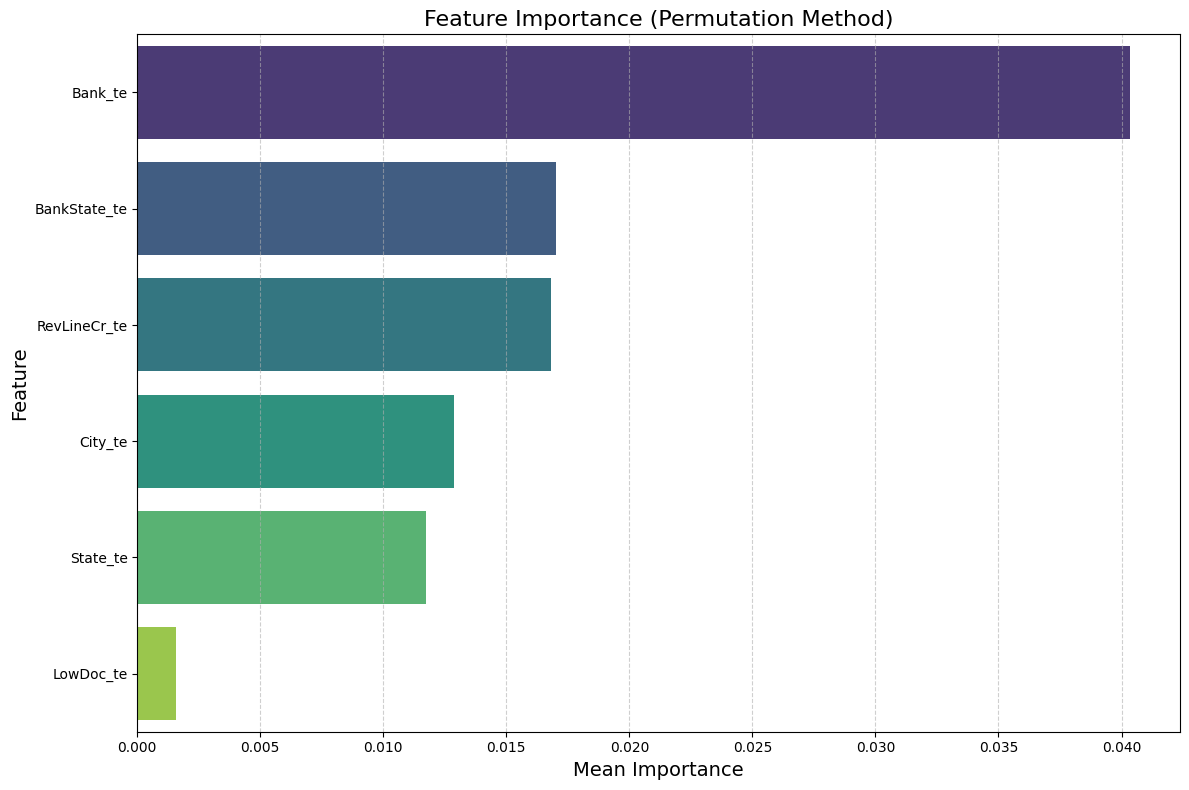

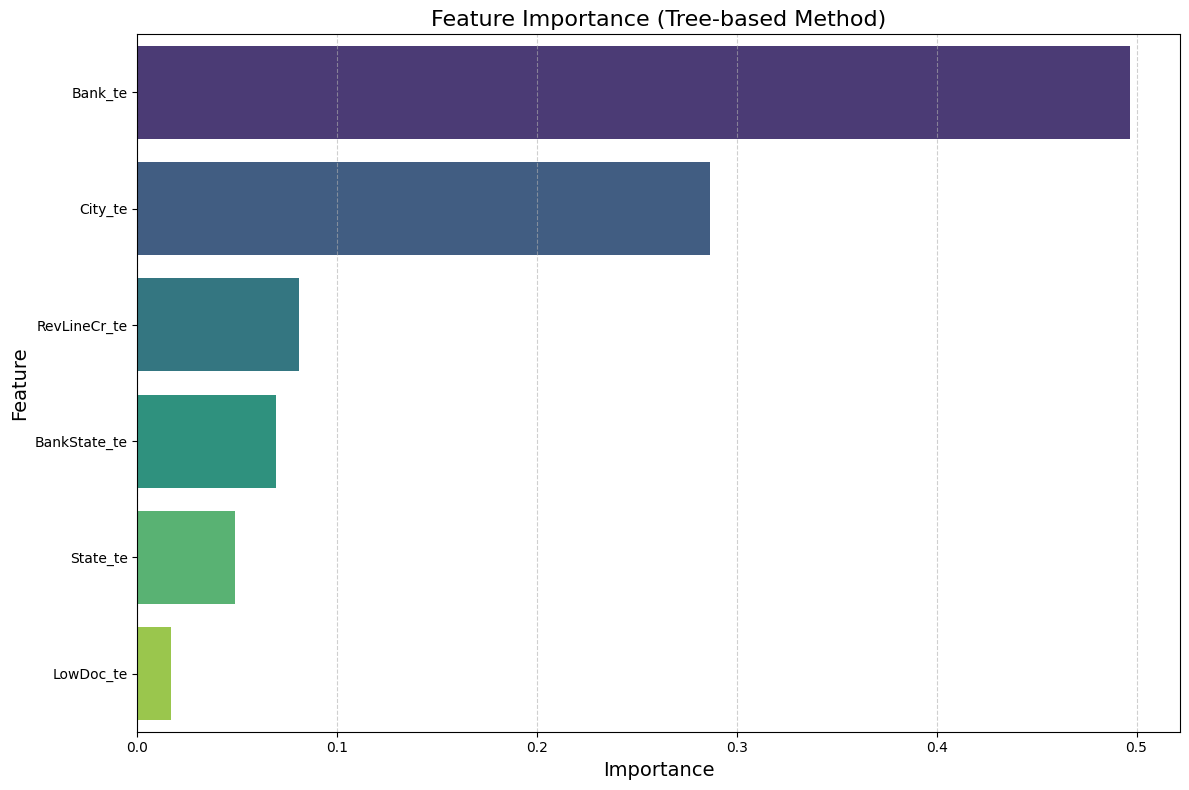


Top 5 most important features (Permutation Method):
        Feature  Importance   Std_Dev
2       Bank_te    0.040359  0.000635
3  BankState_te    0.017026  0.000327
4  RevLineCr_te    0.016826  0.000495
0       City_te    0.012868  0.000482
1      State_te    0.011735  0.000370


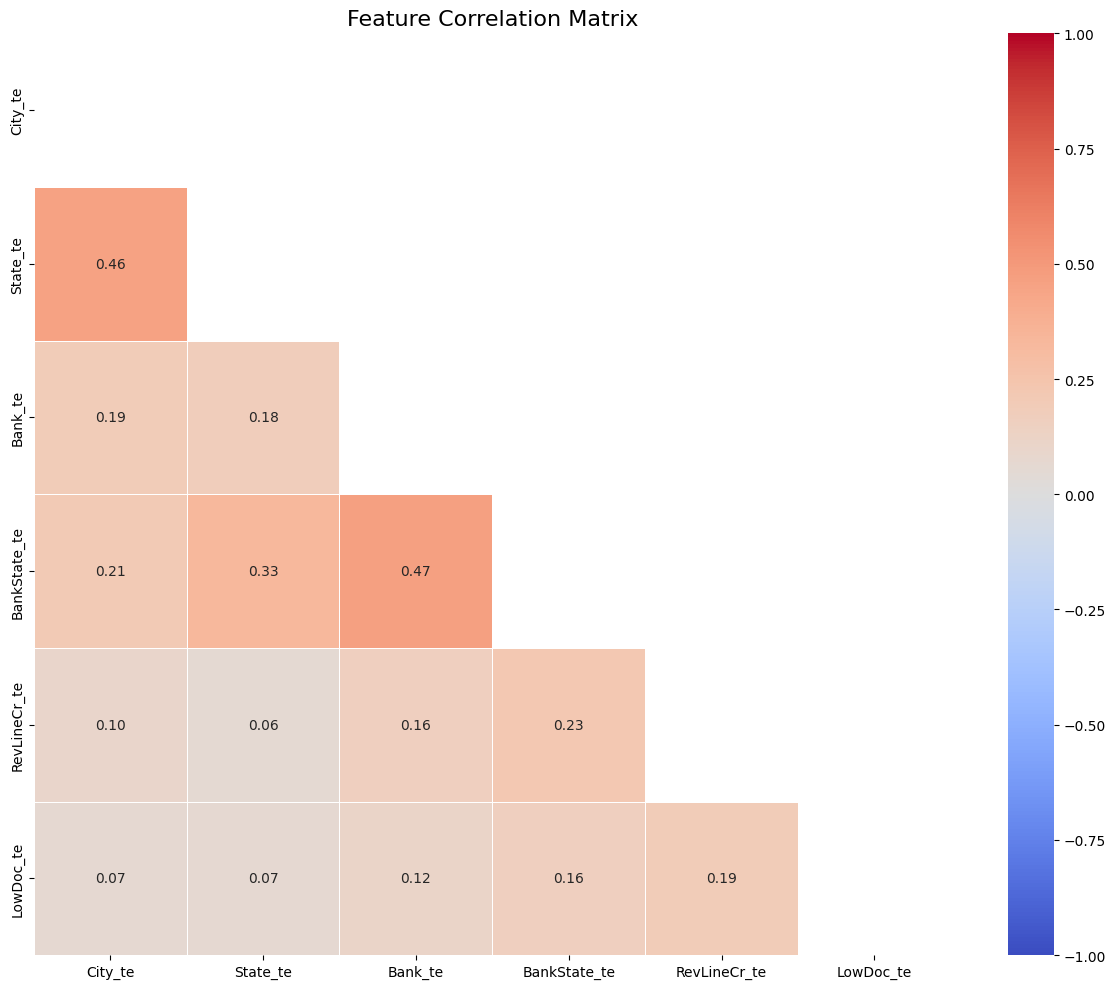


Feature Importance with Original Column Names:
  Original_Feature  Importance   Std_Dev
2             City    0.040359  0.000635
3            State    0.017026  0.000327
4             Bank    0.016826  0.000495
0        BankState    0.012868  0.000482
1        RevLineCr    0.011735  0.000370
5           LowDoc    0.001568  0.000243


In [30]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Target encoded features
target_features = [f"{col}_te" for col in categorical_columns]
X_train_full_te = X_train[target_features]
X_test_te = X_test[target_features]

# Using the best model from previous questions
best_model = final_model  # This is the model trained on full dataset with best parameters

# Calculate permutation feature importance
start_time = time.time()
print("Calculating permutation importance... (this may take a while)")

# Use the test dataset for permutation importance to avoid data leakage
perm_importance = permutation_importance(
    best_model,
    X_test_te,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

elapsed_time = time.time() - start_time
print(f"Permutation importance calculated in {elapsed_time:.2f} seconds")

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': target_features,
    'Importance': perm_importance.importances_mean,
    'Std_Dev': perm_importance.importances_std
})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Also get the built-in feature importance for comparison
tree_importance_df = pd.DataFrame({
    'Feature': target_features,
    'Importance': best_model.feature_importances_
})
tree_importance_df = tree_importance_df.sort_values('Importance', ascending=False)

# Visualize permutation importance
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    palette='viridis'
)
plt.title('Feature Importance (Permutation Method)', fontsize=16)
plt.xlabel('Mean Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('permutation_importance.png', dpi=300)
plt.show()

# Visualize tree-based importance for comparison
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=tree_importance_df,
    palette='viridis'
)
plt.title('Feature Importance (Tree-based Method)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('tree_importance.png', dpi=300)
plt.show()

# Print the top 5 most important features
print("\nTop 5 most important features (Permutation Method):")
print(importance_df.head(5))

# Calculate correlation matrix between features
correlation_matrix = X_test_te.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(correlation_matrix)
sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap='coolwarm',
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    fmt='.2f'
)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()

# Map features back to original names for better interpretation
original_names = [col.replace('_te', '') for col in target_features]
importance_df['Original_Feature'] = original_names

print("\nFeature Importance with Original Column Names:")
print(importance_df[['Original_Feature', 'Importance', 'Std_Dev']].head(len(categorical_columns)))